In [1]:
from matplotlib import pyplot as plt

from datasets import (load_AlphaFold_RoseTTAFold, 
                      load_Y2H_union_25, 
                      load_I3D_exp_24, 
                      load_lit_bm_24, 
                      load_sys_nb, 
                      load_tarassov, 
                      load_lit_24,
                      load_Michaelis_et_al_Nature_2023,
                      AFRF_YEAST_PUB_DATE)
from plotting import COLOR_ALPHAFOLD_ROSETTAFOLD, COLOR_Y2H
from utils import has_interolog_structure_yeast

In [2]:
i3d = load_I3D_exp_24(remove_homodimers=True, include_date=True)
litbm = load_lit_bm_24(remove_homodimers=True, include_date=True)
lit = load_lit_24(remove_homodimers=True, include_date=True)
tarassov = load_tarassov(remove_homodimers=True)
y2h_union = load_Y2H_union_25(remove_homodimers=True)
y2h_union = y2h_union.loc[y2h_union['Uetz-screen'] | y2h_union['Ito-core'] | y2h_union['CCSB-YI1'], :]
sysnb = load_sys_nb(remove_homodimers=True)
apms = load_Michaelis_et_al_Nature_2023(remove_homodimers=True)

afrf = load_AlphaFold_RoseTTAFold(remove_homodimers=True,
                                  restrict_to_high_confidence=True)
abbi = load_Y2H_union_25(remove_homodimers=True)
yeri = abbi.loc[abbi['YeRI'], :].copy()
afrf['has_PDB_hit'] = has_interolog_structure_yeast(afrf, date_cutoff=AFRF_YEAST_PUB_DATE)
yeri['has_PDB_hit'] = has_interolog_structure_yeast(yeri)

NOTE: dropping 6 pairs with missing ORF names


969 407 562 225 337 167 170 133 37


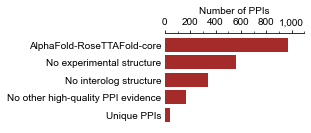

In [8]:
has_interolog = afrf['has_PDB_hit']
in_i3d = afrf.index.isin(i3d.loc[i3d['date'] < AFRF_YEAST_PUB_DATE].index)
in_y2hunion = afrf.index.isin(y2h_union.index)
in_litbm = afrf.index.isin(litbm.loc[litbm['date_bm'] < AFRF_YEAST_PUB_DATE].index)
in_sysnb = afrf.index.isin(sysnb.index)
in_lit = afrf.index.isin(lit.loc[lit['date_first_pub'] < AFRF_YEAST_PUB_DATE].index)
in_tarassov = afrf.index.isin(tarassov.index)
print(
    afrf.shape[0],
    in_i3d.sum(),
      (~in_i3d).sum(),
      ((~in_i3d) & has_interolog).sum(),
      ((~in_i3d) & ~has_interolog).sum(),
      ((~in_i3d) & (~has_interolog) & (in_litbm | in_y2hunion)).sum(),
      ((~in_i3d) & (~has_interolog) & (~in_litbm) & (~in_y2hunion)).sum(),
    ((~in_i3d) & (~in_litbm) & (~in_y2hunion) & (~has_interolog) & (in_sysnb | in_lit | in_tarassov)).sum(),
    ((~in_i3d) & (~in_litbm) & (~in_y2hunion) & (~has_interolog) & (~in_sysnb) & (~in_lit) & (~in_tarassov)).sum(),
)

counts = [afrf.shape[0],
      (~in_i3d).sum(),
      ((~in_i3d) & ~has_interolog).sum(),
      ((~in_i3d) & (~has_interolog) & (~in_litbm) & (~in_y2hunion)).sum(),
    ((~in_i3d) & (~in_litbm) & (~in_y2hunion) & (~has_interolog) & (~in_sysnb) & (~in_lit) & (~in_tarassov)).sum(),
    ]
labels = ['AlphaFold-RoseTTAFold-core',
          'No experimental structure',
          'No interolog structure',
          'No other high-quality PPI evidence',
          'Unique PPIs'
          ]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(w=2.5, h=1.7)
ax.barh(width=counts, y=labels, color=COLOR_ALPHAFOLD_ROSETTAFOLD)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xticks(range(0, 1101, 200))
ax.set_xticks(range(0, 1101, 100), minor=True)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.set_xticklabels([f'{x:,}' for x in ax.get_xticks()])
for loc in ['left', 'right', 'bottom']:
    ax.spines[loc].set_visible(False)
ax.yaxis.set_tick_params(length=0)
ax.set_xlabel('Number of PPIs')
fig.savefig('../figures/AlphaFoldRoseTTAFold-core_flow-chart_bar.pdf',
            bbox_inches='tight')

In [4]:
with open('../output/AFRF_core_yeast_strictly_novel_pairs.txt', 'w') as f:
    f.write('\n'.join(afrf.loc[((~in_i3d) & (~in_litbm) & (~in_y2hunion) & (~has_interolog) & (~in_sysnb) & (~in_lit) & (~in_tarassov))].index.to_list()))

(1880, 10) 135 1745 93 1652 160 1492 109 1383


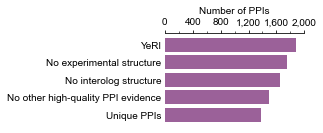

In [5]:
in_i3d_yeri = yeri.index.isin(i3d.index)
in_litbm_yeri = yeri.index.isin(litbm.index)
in_y2hunion_yeri = yeri.index.isin(y2h_union.index)
in_sysnb_yeri = yeri.index.isin(sysnb.index) | yeri.index.isin(apms.index)
in_afrf_core_yeri = yeri.index.isin(afrf.index)
in_lit_yeri = yeri.index.isin(lit.index)
in_tarassov_yeri = yeri.index.isin(tarassov.index)
has_interolog_yeri = yeri['has_PDB_hit']
print(
    yeri.shape,
    in_i3d_yeri.sum(),
    (~in_i3d_yeri).sum(),
    ((~in_i3d_yeri) & has_interolog_yeri).sum(),
    ((~in_i3d_yeri) & (~has_interolog_yeri)).sum(),
    ((~in_i3d_yeri) & (~has_interolog_yeri) & (in_litbm_yeri | in_y2hunion_yeri)).sum(),
    ((~in_i3d_yeri) & (~has_interolog_yeri) & (~in_litbm_yeri) & (~in_y2hunion_yeri)).sum(),
    ((~in_i3d_yeri) & (~has_interolog_yeri) & (~in_litbm_yeri) & (~in_y2hunion_yeri) & (in_sysnb_yeri | in_lit_yeri | in_tarassov_yeri)).sum(),
    ((~in_i3d_yeri) & (~has_interolog_yeri) & (~in_litbm_yeri) & (~in_y2hunion_yeri) & (~in_sysnb_yeri) & (~in_lit_yeri) & (~in_tarassov_yeri)).sum(),
)

counts = [yeri.shape[0],
      (~in_i3d_yeri).sum(),
      ((~in_i3d_yeri) & ~has_interolog_yeri).sum(),
      ((~in_i3d_yeri) & (~has_interolog_yeri) & (~in_litbm_yeri) & (~in_y2hunion_yeri)).sum(),
    ((~in_i3d_yeri) & (~in_litbm_yeri) & (~in_y2hunion_yeri) & (~has_interolog_yeri) & (~in_sysnb_yeri) & (~in_lit_yeri) & (~in_tarassov_yeri)).sum(),
    ]
labels = ['YeRI',
          'No experimental structure',
          'No interolog structure',
          'No other high-quality PPI evidence',
          'Unique PPIs'
          ]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(w=2.5, h=1.7)
ax.barh(width=counts, y=labels, color=COLOR_Y2H)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xticks(range(0, 2001, 400))
ax.set_xticks(range(0, 2001, 200), minor=True)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.set_xticklabels([f'{x:,}' for x in ax.get_xticks()])
for loc in ['left', 'right', 'bottom']:
    ax.spines[loc].set_visible(False)
ax.yaxis.set_tick_params(length=0)
ax.yaxis.set_tick_params(length=0)
ax.set_xlabel('Number of PPIs')
fig.savefig('../figures/YeRI_flow-chart_bar.pdf',
            bbox_inches='tight')